In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load dataset

ata_df=pd.read_excel('/content/sample_data/input_data.xlsx')

In [ ]:
ata_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# checking shape of dataset
ata_df.shape

(8500, 4)

In [ ]:
ata_df['Assignment group'].value_counts()

# there 74 assignment group and these group seems to be imbalanced

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_64       1
GRP_61       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:

# checking individual ticket under group

ata_df[ata_df['Assignment group']=='GRP_67']


,Short description,Description,Caller,Assignment group
5154,unable to complete forecast,unable to complete forecast\n\njochegtyhu is o...,fnqelwpk ahrskvln,GRP_67


In [ ]:
ata_df[ata_df['Assignment group']=='GRP_64']


,Short description,Description,Caller,Assignment group
3628,r: ticket_no1402627 change in report zsdslsum ...,\r\n\r\nreceived from: xawlkiey.demjqrfl@gmail...,xawlkiey demjqrfl,GRP_64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


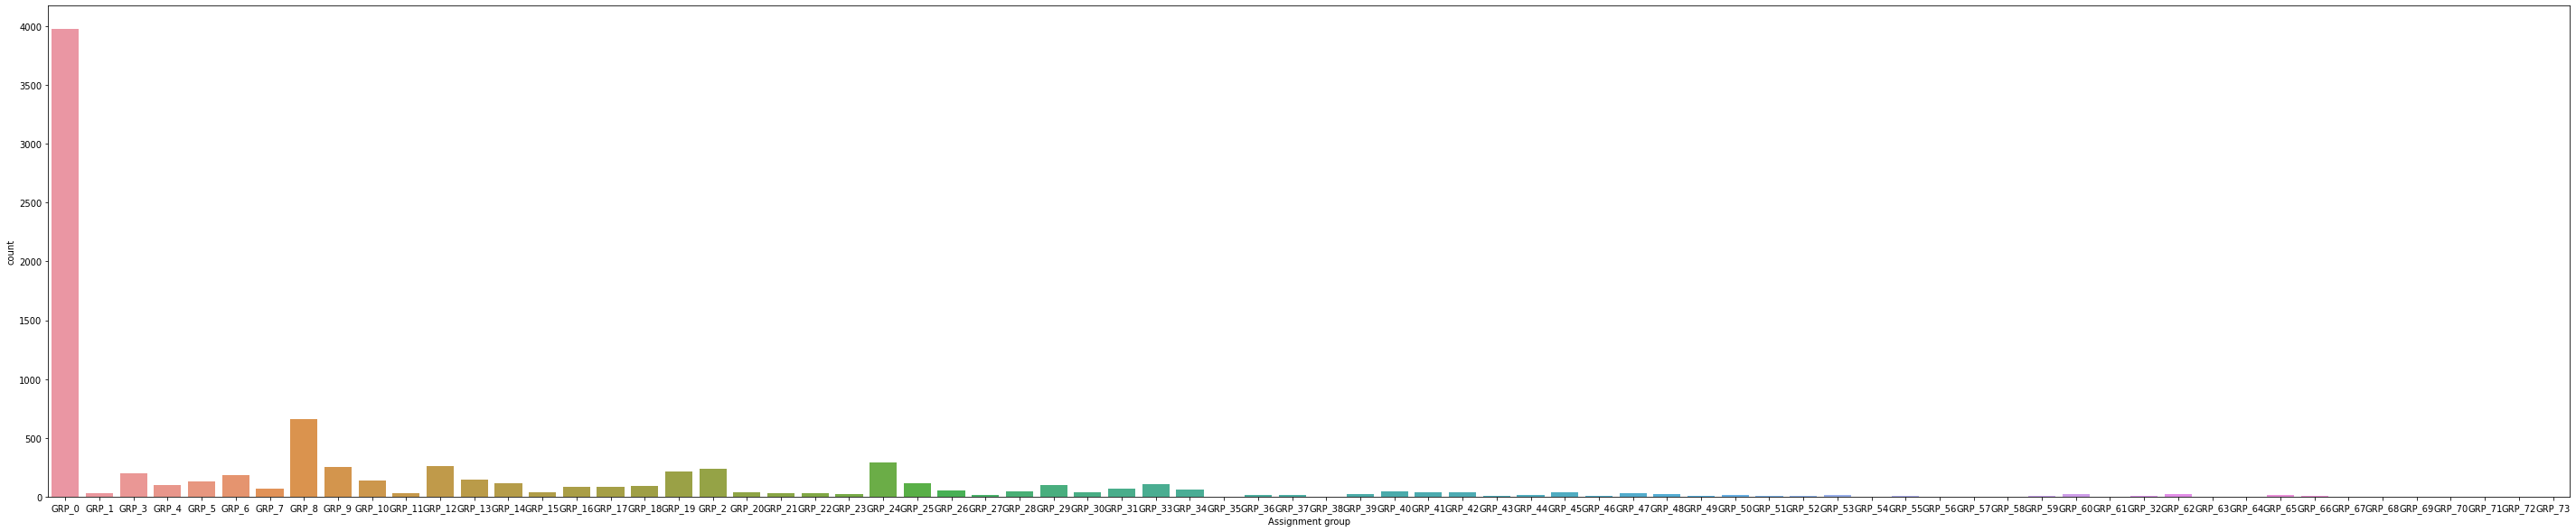

In [ ]:
# checking each assignment group count

import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
sns.countplot(ata_df['Assignment group'])

In [ ]:
ata_df=ata_df[['Short description','Description','Assignment group' ]]

In [ ]:
ata_df.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [ ]:
ata_df.isnull().sum()

Short description    8
Description          1
Assignment group     0
dtype: int64

In [ ]:
ata_df.dropna(inplace=True)
ata_df.isnull().sum()

Short description    0
Description          0
Assignment group     0
dtype: int64

In [ ]:
# Checking duplicate rows
print(ata_df.shape)
print(ata_df.duplicated().sum())
ata_df[ata_df.duplicated()]


(8491, 3)
1717


,Short description,Description,Assignment group
15,ticket update inplant,ticket update inplant,GRP_0
35,ticket employment status new non employee,ticket employment status new non employee,GRP_0
40,ticket update inplant,ticket update inplant,GRP_0
51,call ecwtrjnq jpecxuty,call ecwtrjnq jpecxuty,GRP_0
59,job mm zscr dly merktc failed job scheduler,received monitoring tool company com job mm zs...,GRP_8
...,...,...,...
8462,abended job job scheduler job,received monitoring tool company com abended j...,GRP_9
8466,abended job job scheduler bkwin hostname inc,received monitoring tool company com abended j...,GRP_8
8471,,,GRP_30
8486,ticket update ticket,ticket update ticket,GRP_0


In [ ]:
# drop duplicate rows

ata_df=ata_df.drop_duplicates()
print(ata_df.shape)

(6774, 3)


GRP_0     3124
GRP_8      320
GRP_24     277
GRP_12     243
GRP_2      241
          ... 
GRP_35       1
GRP_64       1
GRP_61       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64 



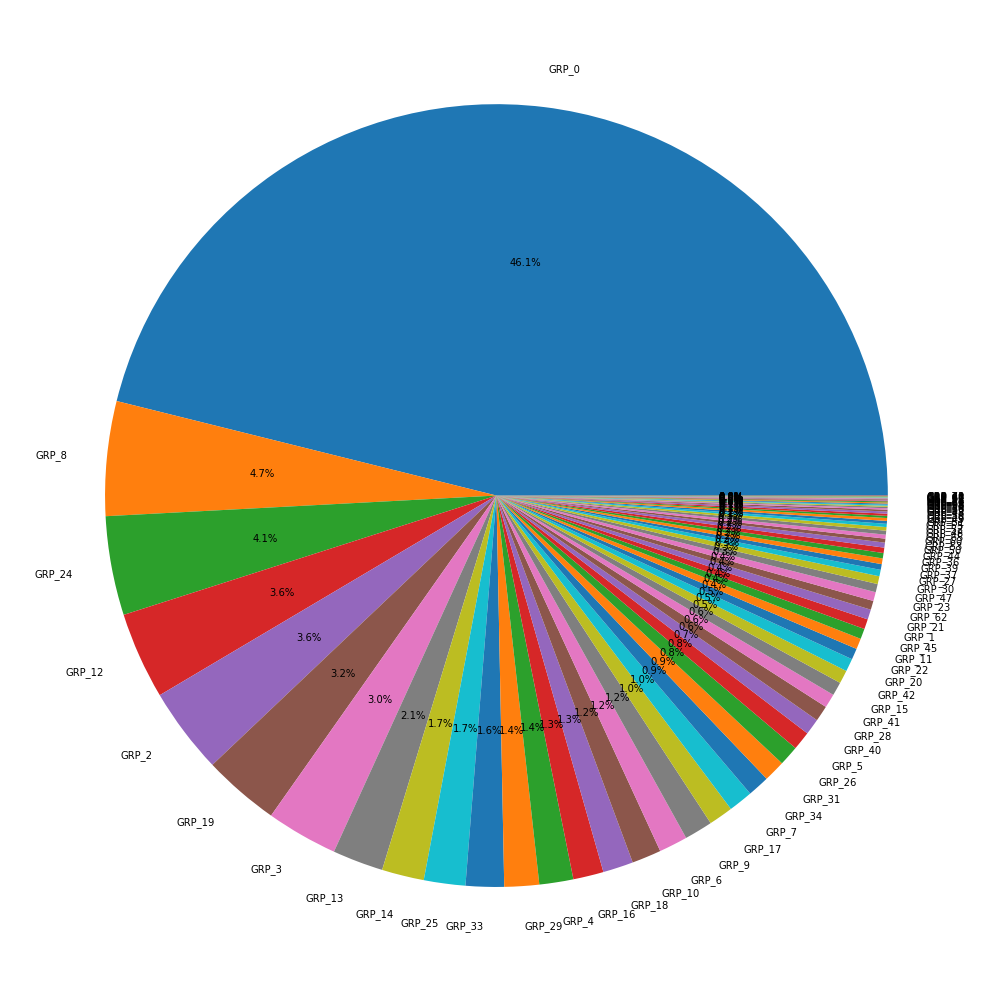

In [ ]:
# context will be much clearer if sentence size is large
import matplotlib.pyplot as plt

print(ata_df['Assignment group'].value_counts() ,"\n")

fig, ax = plt.subplots(1,1, figsize=(30, 18))


f2 = plt.pie(ata_df['Assignment group'].value_counts().values,labels=ata_df['Assignment group'].value_counts().index, autopct='%1.1f%%')
fig.show()

# Pre processing

In [ ]:
from urllib.parse import urlparse
from nltk.corpus import stopwords 
import re
import nltk
from wordcloud import WordCloud
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Removing punctiation marks
import re
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special characters
def remove_specialchars(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords and lemmatization
def remove_stopwords_and_tokenization(text):

    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)


#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_specialchars(text)
    text = remove_stopwords_and_tokenization(text)
    return text


In [ ]:
ata_df['Description']=ata_df['Description'].apply(cleaning)

In [ ]:
ata_df['Short description']=ata_df['Short description'].apply(cleaning)

In [ ]:
ata_df.head(15)

,Short description,Description,Assignment group
0,login issue,verified user detail employee manager name che...,GRP_0
1,outlook,received hmjdrvpb komuaywn gmail com hello tea...,GRP_0
2,cant log vpn,received eylqgodm ybqkwiam gmail com hi log vp...,GRP_0
3,unable access hr tool page,unable access hr tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable log engineering tool skype,unable log engineering tool skype,GRP_0
6,event critical hostname company com value moun...,event critical hostname company com value moun...,GRP_1
7,ticket employment status new non employee,ticket employment status new non employee,GRP_0
8,unable disable add outlook,unable disable add outlook,GRP_0
9,ticket update inplant,ticket update inplant,GRP_0


# Checking most frequent words in Description column

In [ ]:
word_freq=ata_df['Description'].str.split(expand=True).stack().value_counts()

In [ ]:
word_freq[0:10]

com         2826
gmail       2139
yes         2013
please      1938
na          1892
company     1599
received    1578
user        1291
tool        1162
e           1139
dtype: int64

- Single character token need to be removed
- Top 5 token are general email terms need to be removed.
- creating token list to be removed
- (com, job, recived, gmail, yes, please, na,tool)


In [ ]:
# checking most frequent token in individual group

group_0_list=ata_df[ata_df['Assignment group']=='GRP_8']
word_freq_GRP_8=group_0_list['Description'].str.split(expand=True).stack().value_counts()
word_freq_GRP_8[0:40]

yes            1819
na             1768
power           542
site            542
circuit         540
company         439
backup          420
telecom         418
vendor          409
network         273
outage          272
ticket          270
type            268
notified        268
scheduled       268
cert            268
maintenance     268
provider        268
maint           268
job             179
et              169
global          143
please          141
email           140
working         137
contact         137
x               136
active          136
reset           136
phone           136
additional      135
remote          135
top             134
specify         134
dial            134
diagnostics     134
gsc             134
verified        134
equipment       134
start           134
dtype: int64

In [ ]:
group_0_list=ata_df[ata_df['Assignment group']=='GRP_0']
word_freq_GRP_0=group_0_list['Description'].str.split(expand=True).stack().value_counts()
word_freq_GRP_0[0:30]

com          1393
gmail        1219
password      987
received      769
please        735
user          656
erp           549
company       450
unable        443
reset         433
tool          430
issue         429
email         423
outlook       374
access        326
hello         326
account       318
help          306
name          305
error         301
login         292
need          257
sid           240
system        233
microsoft     228
able          223
hi            209
message       202
skype         195
vpn           192
dtype: int64

In [ ]:
group_0_list=ata_df[ata_df['Assignment group']=='GRP_24']
word_freq_GRP_24=group_0_list['Description'].str.split(expand=True).stack().value_counts()
word_freq_GRP_24[0:40]

mit             87
probleme        80
r               46
f               45
setup           45
w               41
new             38
ewew            34
rechner         32
defekt          23
nicht           23
und             23
tool            21
bitte           21
install         21
der             20
eu              20
hallo           18
drucker         17
ist             16
wnkpzcmv        16
jionmpsf        16
die             14
wu              14
auf             14
csenjruz        13
support         13
niptbwdq        13
da              13
jwoqbuml        11
vzqomdgt        11
funktioniert    10
monitor         10
wrcktgbd         9
pc               9
l                9
den              9
wzrgyunp         9
du               9
lan              8
dtype: int64

- there are some garbage token like (wzrgyunp,wrcktgbd)

In [ ]:
group_0_list=ata_df[ata_df['Assignment group']=='GRP_12']
word_freq_GRP_12=group_0_list['Description'].str.split(expand=True).stack().value_counts()
word_freq_GRP_12[0:40]

hostname      201
inside        136
access        122
com           114
gmail          92
tcp            90
asa            89
server         87
please         69
space          59
group          58
src            56
acl            56
outside        56
deny           56
dst            56
file           49
received       49
aug            48
event          48
company        46
drive          40
ticket         35
disk           32
c              32
jul            32
user           31
available      31
f              29
data           27
consumed       26
interface      26
connection     26
folder         26
inbound        25
error          24
syn            24
port           24
denied         24
service        24
dtype: int64

In [ ]:
ata_df[ata_df['Assignment group']=='GRP_12']

,Short description,Description,Assignment group
97,amssm c label sys amssm ef server space consum...,amssm c label sys amssm ef server space consum...,GRP_12
175,job job failed job scheduler,received monitoring tool company com job job f...,GRP_12
278,sn identified unavailable via esr monitoring s...,sn identified unavailable via esr monitoring s...,GRP_12
336,data back germany,data back germany,GRP_12
337,server ekpsm located germany location since,server ekpsm located germany location since,GRP_12
...,...,...,...
8342,folder access hostname kt transition infrastru...,provide access hnynhsth jsuyhwssad user id pra...,GRP_12
8382,mdm tool working via citrix system,hello team could please support mdm issue via ...,GRP_12
8400,hostname memory usage,internal error unable find process probe proce...,GRP_12
8426,vmware tool running server hostname resided ho...,vmware tool running server hostname resided ho...,GRP_12


# Analyzing short description token

In [ ]:
group_0_list=ata_df[ata_df['Assignment group']=='GRP_0']
word_freq_GRP_0=group_0_list['Short description'].str.split(expand=True).stack().value_counts()
word_freq_GRP_0[0:30]

password         598
erp              467
unable           408
reset            315
issue            295
tool             293
outlook          290
account          220
access           205
login            197
sid              178
user             172
skype            154
vpn              138
email            134
working          133
error            120
locked           117
engineering      109
crm              107
need             104
company           95
log               88
printer           87
open              84
connect           80
unlock            79
update            79
ticket            79
collaboration     77
dtype: int64

- from above token we can see in group 0, most of the issues are related to login and access.
- Short description is  much clear picture than description column

In [ ]:
# checking bigram
(pd.Series(nltk.ngrams(group_0_list['Short description'], 1)).value_counts())[0:30]

(password reset,)                                         18
(mobile device activation,)                               12
(outlook issue,)                                           8
(vpn issue,)                                               7
(erp sid password reset,)                                  6
(printer problem issue information,)                       6
(vpn,)                                                     6
(erp,)                                                     6
(deployment notification telephony software,)              5
(business client issue,)                                   5
(skype working,)                                           5
(login issue,)                                             5
(reset password,)                                          5
(ticket comment added,)                                    5
(urgent help required outlook crm mfg tooltion issue,)     5
(engineering tool working,)                                5
(skype,)                

In [ ]:
## Bigram also suggest in GRP_0 group issues reported are related to logon on/ access to diffrent system

In [ ]:
print(ata_df[ata_df['Assignment group']=='GRP_72'])
print(ata_df[ata_df['Assignment group']=='GRP_73'])

                          Short description  ... Assignment group
7828                         account locked  ...           GRP_72
8387  ticket ticket update anftgup nftgyair  ...           GRP_72

[2 rows x 3 columns]
        Short description  ... Assignment group
8197  oneteam sso working  ...           GRP_73

[1 rows x 3 columns]
